In [49]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [51]:
filename = '/content/drive/MyDrive/CodingDojo/Week3_PythonforDataVisualization/Exercises_and_Homework/PLWeek51.xlsx'
df = pd.read_excel(filename)
df.head()

,Season,Played,Won,Drawn,Lost,Goals For,Goals Against,Goal Difference,Points,Position,Final Points,Final Position
0,1992/93,19,9,2,8,22,20,2,29,8,56.0,10.0
1,1993/94,21,9,7,5,20,13,7,34,5,71.0,4.0
2,1994/95,19,6,6,7,23,22,1,24,11,51.0,12.0
3,1995/96,18,8,7,3,23,12,11,31,6,63.0,5.0
4,1996/97,17,10,5,2,34,16,18,35,2,68.0,3.0


In [9]:
df.tail()

,Season,Played,Won,Drawn,Lost,Goals For,Goals Against,Goal Difference,Points,Position,Final Points,Final Position
24,2016/17,17,10,4,3,38,19,19,34,4,75.0,5.0
25,2017/18,18,10,3,5,31,20,11,33,5,63.0,6.0
26,2018/19,17,10,4,3,37,23,14,34,5,70.0,5.0
27,2019/20,17,5,7,5,24,27,-3,22,10,56.0,8.0
28,2020/21,13,4,2,7,11,16,-5,14,15,NaN,NaN


In [5]:
nRows , nCols = df.shape

In [6]:
nRows

29

In [7]:
nCols

12

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Season           29 non-null     object 
 1   Played           29 non-null     int64  
 2   Won              29 non-null     int64  
 3   Drawn            29 non-null     int64  
 4   Lost             29 non-null     int64  
 5   Goals For        29 non-null     int64  
 6   Goals Against    29 non-null     int64  
 7   Goal Difference  29 non-null     int64  
 8   Points           29 non-null     int64  
 9   Position         29 non-null     int64  
 10  Final Points     28 non-null     float64
 11  Final Position   28 non-null     float64
dtypes: float64(2), int64(9), object(1)
memory usage: 2.8+ KB


In [ ]:
df['Final Points'].fillna(value=61, inplace=True)
df.tail()

In [13]:
df['Final Position'].fillna(value=8, inplace=True)
df.tail()

,Season,Played,Won,Drawn,Lost,Goals For,Goals Against,Goal Difference,Points,Position,Final Points,Final Position
24,2016/17,17,10,4,3,38,19,19,34,4,75.0,5.0
25,2017/18,18,10,3,5,31,20,11,33,5,63.0,6.0
26,2018/19,17,10,4,3,37,23,14,34,5,70.0,5.0
27,2019/20,17,5,7,5,24,27,-3,22,10,56.0,8.0
28,2020/21,13,4,2,7,11,16,-5,14,15,61.0,8.0


In [ ]:
df.info()

#Task
Background: Arsenal is a professional football club based in London that plays in the Englishe Premier League. 

The dataset collected is based on Arsenal game results after some matches played up to December 18th each year from 1992/93 to 2020/21. I am interested in comparing games won, lost and drawn against the total matches played. Based on the output of the visualization, I will give my prediction of how the remaining season is going to look like for the Gunners. 



In [62]:
won = np.array(df['Won'])
lost = np.array(df['Lost'])
drawn = np.array(df['Drawn'])
seasons = np.array(df['Season'])

In [64]:
current_rank = np.array(df['Position'])
final_rank = np.array(df['Final Position'])

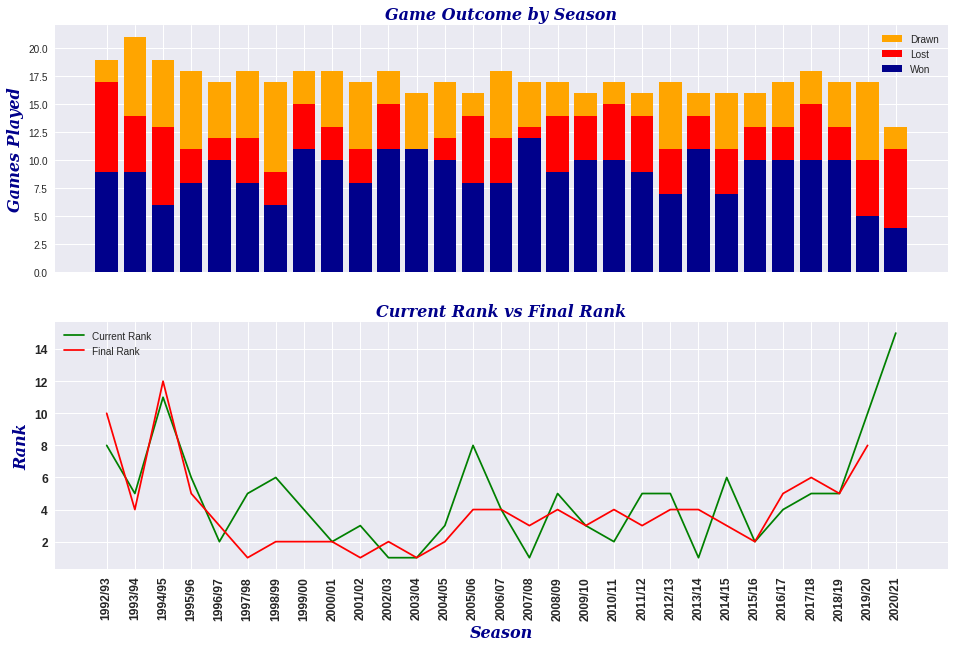

In [81]:
# Help from: https://www.weirdgeek.com/2018/11/plotting-stacked-bar-graph/
plt.style.use('seaborn')
fig, axs = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(16, 10))
axs[0].bar(seasons, drawn, color='orange', label='Drawn', bottom=lost+won)
axs[0].bar(seasons, lost, color='red', label='Lost', bottom=won)
axs[0].bar(seasons, won, color='darkblue', label='Won', bottom=None)
plt.xticks(rotation=90, fontsize=12, fontweight='bold')
plt.yticks(fontsize=12, fontweight='bold')

font = {'family': 'serif', 
        'fontstyle': 'italic',
        'fontsize': 16,
        'fontweight': 'bold',
        'color': 'DarkBlue'
        }
axs[0].set_title('Game Outcome by Season', fontdict=font)
axs[0].set_ylabel('Games Played', fontdict=font)
axs[0].legend(loc='upper right')

axs[1].plot(seasons, current_rank, c='green', label='Current Rank')
axs[1].plot(seasons, final_rank, c='red', label='Final Rank')
axs[1].set_title('Current Rank vs Final Rank', fontdict=font)
plt.xticks(rotation=90);
axs[1].set_xlabel('Season', fontdict=font)
axs[1].set_ylabel('Rank', fontdict=font)
axs[1].legend(loc='best')

plt.show()



#Conclusion
From the stacked bar graphs and line plots, we can see that the Arsenal team was having one of their worst ever Premier League starts on record in these 3 decades.From 13 matches played so far, they have 14 points and are placed in 15th on the table. One striking point is that the number of matches lost during the 2020/21 season has been one of their highest since the season 1992/93. This trends indicates that the remainder of the season is likely to look bad for Arsenal. 